In [5]:
import matplotlib as m
import matplotlib.pyplot as plt
from operator import itemgetter
import pandas as pd
import geopandas as gpd
import numpy as np
import copy
from scipy import stats
import json

In [6]:
# Summation of the value insde a dictionary
def dictsum(myDict):      
    sum = 0
    for i in myDict: 
        sum = sum + myDict[i] 
    return sum

In [11]:
# VSL
file = open("VSL_dict.json", "r")
VSL = file.read()
VSL = json.loads(VSL)

In [12]:
# total number of deaths caused by country i and happen in country j
file = open("con_mort_tol.json", "r")
con_mort_tol = file.read()
con_mort_tol = json.loads(con_mort_tol)

In [13]:
Countries = list(con_mort_tol.keys())

## Scenario 1: Different VSLs for different countries
### Externality_A = a × VSL_A + b × VSL_B + c × VSL_C + d × VSL_D

In [35]:
S1_ext = {}
for country_i in con_mort_tol:
    S1_ext[country_i] = {}
    for country_j in con_mort_tol[country_i]:
        S1_ext[country_i][country_j] = con_mort_tol[country_i][country_j] * VSL[country_j] 

In [36]:
S1_ext_total = {}
for country in S1_ext:
    S1_ext_total[country] = dictsum(S1_ext[country])

## Scenario 2: Same VSL as the consumer
### Externality_A = (a + b + c + d) × VSL_A

In [37]:
S2_ext_total = {}
for country_i in con_mort_tol:
    S2_ext_total[country_i] = dictsum(con_mort_tol[country_i]) * VSL[country_i]  

In [38]:
diff_12 = {}
for i in S2_ext_total:
     diff_12[i] = (S2_ext_total[i] - S1_ext_total[i])

In [39]:
print(dict(sorted(diff_12.items(), key=lambda item: item[1])))

{'CHN': -136977.86679366673, 'IND': -71914.02570134842, 'MEX': -26706.26747632955, 'PAK': -18590.055166478087, 'IDN': -15729.524154862258, 'VNM': -11723.420930921511, 'MMR': -11459.332587660967, 'PRK': -10600.227698268709, 'PHL': -10106.135930643668, 'UKR': -9681.394225571414, 'DZA': -8669.541867390824, 'BGD': -8049.289680903571, 'MAR': -7042.506923390223, 'EGY': -7004.995059743636, 'SRB': -6276.648222640848, 'THA': -6195.200553029143, 'BIH': -5796.298923493609, 'UZB': -5786.786049804387, 'CUB': -4851.072109539944, 'NPL': -3940.2023360683797, 'NGA': -3636.4452564749263, 'SYR': -3187.150984635151, 'AFG': -2983.1227743960126, 'COL': -2761.7897453149053, 'TUN': -2570.9145723601273, 'SUD': -2203.080593506712, 'BRA': -2030.130438395281, 'IRQ': -1984.9576012244488, 'YEM': -1970.0322652220912, 'ETH': -1940.2141950676041, 'MNG': -1741.26775548982, 'PER': -1676.9483693429393, 'AGO': -1638.1987969732063, 'GHA': -1632.5291037392685, 'HTI': -1517.105052000775, 'MOZ': -1498.5511832271134, 'COD': -1

## Scenario 3: Zero VSL for other countries
### Externality_A = a × VSL_A

In [40]:
S3_ext_total = {}
for country_i in con_mort_tol:
    print(country_i,con_mort_tol[country_i][country_i],VSL[country_i])
    S3_ext_total[country_i] = con_mort_tol[country_i][country_i] * VSL[country_i]

AFG 1064.082706287054 0.105
ALB 296.823022835936 0.736
DZA 2151.1559357022147 0.838
AND 0.1448093961988105 7.444
AGO 6451.286881864739 0.7190000000000001
ATG 0.0 2.283
ARG 9057.207827758964 2.144
ARM 156.64990435767365 0.6679999999999999
ABW 0.002985047878752498 6.1488377992140055
AUS 3651.5255219638157 10.335
AUT 565.9832919183191 8.157
AZE 744.3821503592444 1.129
BHS 34.62209329582029 3.568
BHR 5.956603136803137 3.4130000000000003
BGD 13581.963699561884 0.205
BRB 11.29919653574269 2.496
BLR 92.30909239321878 1.111
BEL 1187.2392970960555 7.6129999999999995
BLZ 0.30915078554001085 0.772
BEN 677.2576994574268 0.145
BMU 0.0004042873678055336 18.261
BTN 7.448877924762482 0.409
BOL 1307.0740547626685 0.516
BIH 1226.6391568821768 0.8029999999999999
BWA 19.41949315502864 1.111
BRA 72545.4262061024 1.695
VGB 0.0 7.465
BRN 9.437757322409773 6.539
BGR 862.4246245486202 1.287
BFA 219.42949093082123 0.11
BDI 398.2373949925673 0.045
KHM 910.5163910242915 0.184
CMR 1262.646270466035 0.2269999999999

In [41]:
diff_13 = {}
for i in S3_ext_total:
     diff_13[i] = (S3_ext_total[i] - S1_ext_total[i])

In [42]:
print(dict(sorted(diff_13.items(), key=lambda item: item[1])))

{'CHN': -303075.32328093005, 'USA': -284844.496938289, 'IND': -100454.21834689872, 'FRA': -92294.68992454554, 'JPN': -81920.15264508978, 'DEU': -81594.92833656212, 'GBR': -74035.93011977692, 'TUR': -57521.09088622073, 'CAN': -54371.09341409779, 'KOR': -50703.022516081495, 'MEX': -49717.74629802909, 'ITA': -44861.60496134208, 'SAU': -36711.1417787849, 'ESP': -36125.950664027056, 'RUS': -33409.85934016391, 'BEL': -30633.11769521112, 'PAK': -30250.60472030722, 'HKG': -29228.97985812288, 'VEN': -28510.931263853687, 'NLD': -26443.565481517144, 'POL': -26384.59421092981, 'IRN': -25749.079580491507, 'IDN': -23925.328600164023, 'THA': -20805.7365206056, 'CHE': -19925.230900016155, 'BRA': -18092.76125641806, 'AUS': -16960.466811858656, 'MYS': -16959.91766317802, 'PHL': -16646.595218292852, 'SRB': -16385.30688985821, 'CZE': -16379.615614570046, 'ARE': -15314.556117293218, 'VNM': -15171.616625195324, 'IRQ': -14870.951503056487, 'TWN': -14668.235886039853, 'DZA': -13714.206516045535, 'MMR': -13330

----

In [43]:
df_shp = gpd.read_file('/mnt/c/Users/Shiyuan Wang/Desktop/natural_earth_vector/10m_cultural/ne_10m_admin_0_countries.shp')

In [44]:
df_shp["S1_ext_total"] = np.nan
df_shp["S2_ext_total"] = np.nan
df_shp["S3_ext_total"] = np.nan
df_shp["diff_12"] = np.nan

In [45]:
for i in df_shp['ADM0_A3']:
    if i in Countries:
        df_shp.loc[df_shp['ADM0_A3'] == i,"S1_ext_total"] = S1_ext_total[i]
        df_shp.loc[df_shp['ADM0_A3'] == i,"S2_ext_total"] = S2_ext_total[i]
        df_shp.loc[df_shp['ADM0_A3'] == i,"S3_ext_total"] = S3_ext_total[i]
        df_shp.loc[df_shp['ADM0_A3'] == i,"diff_12"] = diff_12[i]

    if i == 'PSX':
        df_shp.loc[df_shp['ADM0_A3'] == i,"S1_ext_total"] = S1_ext_total['PSE']
        df_shp.loc[df_shp['ADM0_A3'] == i,"S2_ext_total"] = S2_ext_total['PSE']
        df_shp.loc[df_shp['ADM0_A3'] == i,"S3_ext_total"] = S3_ext_total['PSE']
        df_shp.loc[df_shp['ADM0_A3'] == i,"diff_12"] = diff_12['PSE']

        
    if i == 'SDN':
        df_shp.loc[df_shp['ADM0_A3'] == i,"S1_ext_total"] = S1_ext_total['SUD']
        df_shp.loc[df_shp['ADM0_A3'] == i,"S2_ext_total"] = S2_ext_total['SUD']
        df_shp.loc[df_shp['ADM0_A3'] == i,"S3_ext_total"] = S3_ext_total['SUD']
        df_shp.loc[df_shp['ADM0_A3'] == i,"diff_12"] = diff_12['SUD']

    if i == 'ROW':
        continue

In [46]:
df_shp['S1_ext_total_log'] = np.log10(df_shp['S1_ext_total'])
df_shp['S2_ext_total_log'] = np.log10(df_shp['S2_ext_total'])
df_shp['S3_ext_total_log'] = np.log10(df_shp['S3_ext_total'])
df_shp['diff_12_log'] = [np.log10(df_shp.loc[i,'diff_12']) if df_shp.loc[i,'diff_12'] >= 0 else -np.log10(-df_shp.loc[i,'diff_12']) for i in range(len(df_shp))]

/home/shiyuan/anaconda3/envs/py36/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [47]:
from matplotlib.colors import BoundaryNorm, ListedColormap
from matplotlib.colorbar import ColorbarBase
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize']=(20,9)
mpl.style.use('ggplot')

In [48]:
print(dict(sorted(S1_ext_total.items(), key=lambda item: item[1])))

{'ROW': 0.0, 'VGB': 29.82014747320437, 'STP': 32.377787050561196, 'VUT': 40.2936647589778, 'WSM': 43.41220159733114, 'GRL': 67.84781255149923, 'GMB': 70.09515440086885, 'ATG': 88.35280335612401, 'ABW': 92.98433935470088, 'AND': 95.61294595038396, 'BLZ': 113.42096038950133, 'SMR': 117.55234073161236, 'CAF': 128.47657779530917, 'MDA': 129.871964406369, 'PYF': 134.23500284024126, 'CYM': 137.50112943963836, 'CPV': 141.90147830317937, 'FJI': 149.13178819535383, 'BMU': 165.24211705432148, 'SYC': 170.34966236411518, 'SWZ': 184.48613731777473, 'BDI': 193.3396347283673, 'BRB': 203.81429728525185, 'SUR': 210.31579723753913, 'LSO': 225.73484806480215, 'SDS': 227.4499440633637, 'DJI': 240.98456386007834, 'MDV': 259.62193900259547, 'MWI': 319.4750506068022, 'NCL': 333.29666864192365, 'LIE': 385.9665327931367, 'SLE': 392.13995941953937, 'LBR': 403.0795326782198, 'TGO': 407.6573142011639, 'RWA': 410.9221987420648, 'BTN': 414.9826305428764, 'BRN': 443.8676230813323, 'MCO': 445.19336089587017, 'NER': 4

In [49]:
# cmap = ListedColormap(['#fff7ec','#fee8c8','#fdd49e','#fdbb84','#fc8d59','#ef6548','#d7301f','#990000'])
# bounds = [80,500,1000,5000,10000,50000,100000,500000,3048050]
# norm = BoundaryNorm(bounds, cmap.N)

In [50]:
min(df_shp['S1_ext_total_log']),max(df_shp['S1_ext_total_log'])

(1.474509786891641, 6.185516725058575)

### 1. Reverse the colormap
### 2. Put a legend for scale

In [51]:
import cartopy.crs as ccrs
import cartopy.feature as cf
from matplotlib import pyplot as plt
import cartopy

/home/shiyuan/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator


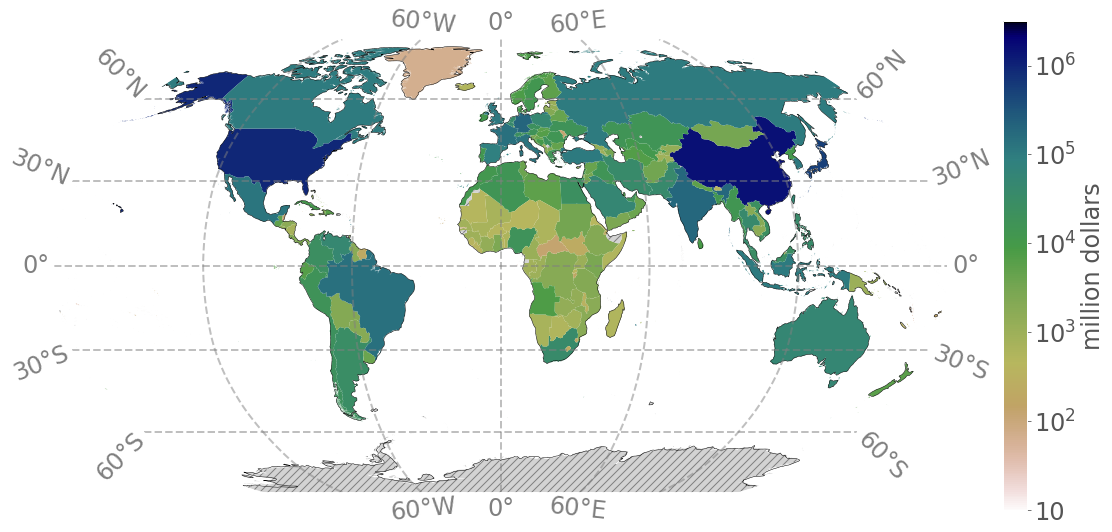

In [75]:
fig, ax = plt.subplots()
ax = plt.axes(projection=ccrs.Robinson())

robinson = ccrs.Robinson().proj4_init

df_shp.to_crs(robinson).plot(linewidths=0,column='S1_ext_total_log',ax=ax, vmin=1,vmax=6.5, legend=True, cmap = m.cm.gist_earth.reversed() , missing_kwds={
        "color": "lightgrey",
        "edgecolor": "grey",
        "hatch": "///",
        "label": "Missing values",},
        legend_kwds={'fmt': "{:.2f}"})

colourbar = ax.get_figure().get_axes()[1]

# yticks = ['80','500','1000','5000','10000','50000','100000','500000','3048050']

# colourbar.set_yticklabels(yticks)
colourbar = ax.get_figure().get_axes()[1]
yticks = ['10','10$^{2}$','10$^{3}$','10$^{4}$','10$^{5}$','10$^{6}$']
colourbar.set_yticklabels(yticks,fontsize=24)
colourbar.set_ylabel('million dollars', fontsize=24)
ax.coastlines()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabel_style = {'size': 24,'color':'gray'}
gl.ylabel_style = {'size': 24,'color':'gray'}
# plt.title('Externality——Scenario 1: Different VSLs for different countries',fontsize=24)
ax.axis('off');

In [53]:
print(dict(sorted(S1_ext_total.items(), key=lambda item: item[1])))

{'ROW': 0.0, 'VGB': 29.82014747320437, 'STP': 32.377787050561196, 'VUT': 40.2936647589778, 'WSM': 43.41220159733114, 'GRL': 67.84781255149923, 'GMB': 70.09515440086885, 'ATG': 88.35280335612401, 'ABW': 92.98433935470088, 'AND': 95.61294595038396, 'BLZ': 113.42096038950133, 'SMR': 117.55234073161236, 'CAF': 128.47657779530917, 'MDA': 129.871964406369, 'PYF': 134.23500284024126, 'CYM': 137.50112943963836, 'CPV': 141.90147830317937, 'FJI': 149.13178819535383, 'BMU': 165.24211705432148, 'SYC': 170.34966236411518, 'SWZ': 184.48613731777473, 'BDI': 193.3396347283673, 'BRB': 203.81429728525185, 'SUR': 210.31579723753913, 'LSO': 225.73484806480215, 'SDS': 227.4499440633637, 'DJI': 240.98456386007834, 'MDV': 259.62193900259547, 'MWI': 319.4750506068022, 'NCL': 333.29666864192365, 'LIE': 385.9665327931367, 'SLE': 392.13995941953937, 'LBR': 403.0795326782198, 'TGO': 407.6573142011639, 'RWA': 410.9221987420648, 'BTN': 414.9826305428764, 'BRN': 443.8676230813323, 'MCO': 445.19336089587017, 'NER': 4

In [54]:
# cmap = ListedColormap(['#fff7ec','#fee8c8','#fdd49e','#fdbb84','#fc8d59','#ef6548','#d7301f','#b30000','#7f0000'])
# bounds = [120,500,1000,5000,10000,50000,100000,500000,1000000,9161003]
# norm = BoundaryNorm(bounds, cmap.N)

In [55]:
min(df_shp['S2_ext_total_log']),max(df_shp['S2_ext_total_log'])

(0.9086308411589419, 6.346767330450487)

/home/shiyuan/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  


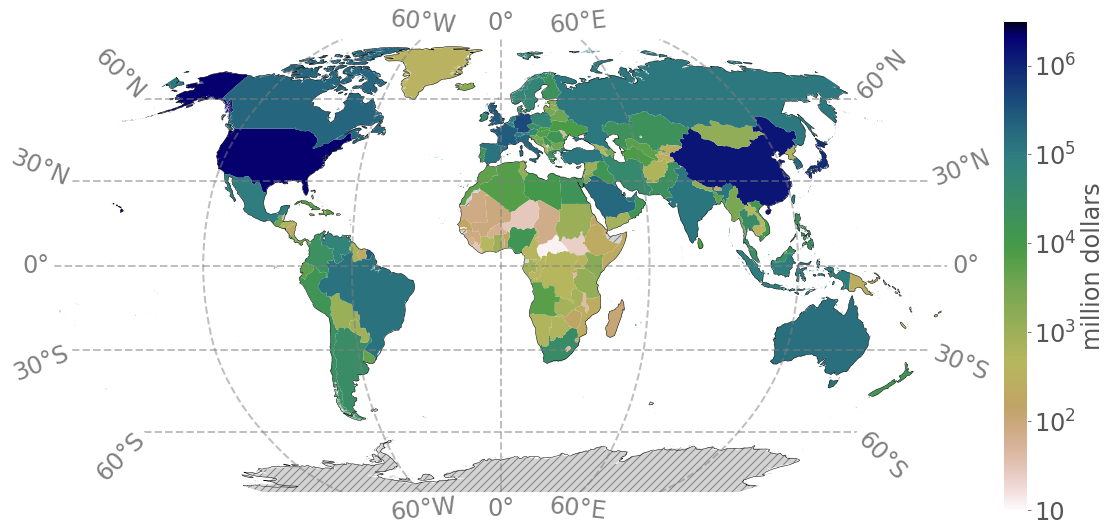

In [76]:
fig, ax = plt.subplots()
ax = plt.axes(projection=ccrs.Robinson())

robinson = ccrs.Robinson().proj4_init
df_shp.to_crs(robinson).plot(linewidths=0,column='S2_ext_total_log',ax=ax, vmin=1,vmax=6.5, legend=True, cmap = m.cm.gist_earth.reversed(),missing_kwds={
        "color": "lightgrey",
        "edgecolor": "grey",
        "hatch": "///",
        "label": "Missing values",},
        legend_kwds={'fmt': "{:.2f}"})

colourbar = ax.get_figure().get_axes()[1]
yticks = ['10','10$^{2}$','10$^{3}$','10$^{4}$','10$^{5}$','10$^{6}$']
colourbar.set_yticklabels(yticks,fontsize=24)
colourbar.set_ylabel('million dollars', fontsize=24)   
ax.coastlines()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabel_style = {'size': 24,'color':'gray'}
gl.ylabel_style = {'size': 24,'color':'gray'}
# plt.title('Externality——Scenario 2: Same VSL as the consumer',fontsize=24)
ax.axis('off');

In [57]:
print(dict(sorted(S2_ext_total.items(), key=lambda item: item[1])))

{'ROW': 0.0, 'GMB': 8.102720179140782, 'STP': 11.33865885445383, 'CAF': 12.161650446570363, 'VUT': 17.759501472566296, 'WSM': 22.532132348216503, 'SDS': 23.51375760326856, 'NER': 28.397271079782715, 'LBR': 31.151776743470553, 'MWI': 40.48984318883591, 'BDI': 41.77611888722329, 'LSO': 42.74086620142182, 'CPV': 44.59754112249346, 'BLZ': 46.73213577497093, 'MDA': 46.73863889309487, 'BFA': 65.18599753598517, 'SLE': 66.85211472023013, 'TCD': 73.23401199095865, 'FJI': 78.26998123414955, 'MRT': 83.5918806649223, 'GIN': 84.85984861086727, 'TGO': 89.75665676445213, 'ATG': 90.913916516977, 'MLI': 93.76821353475194, 'SWZ': 99.54172381072654, 'MDG': 109.55802387831241, 'VGB': 130.49500882357694, 'RWA': 131.07387379920476, 'ERI': 154.55647311351927, 'DJI': 166.59567832803208, 'SEN': 174.4725372927008, 'BEN': 176.2072341253701, 'ZWE': 177.29362009959482, 'BTN': 189.01623627167996, 'PYF': 193.61414086523953, 'NIC': 196.95395687675094, 'SUR': 204.2424864954882, 'BRB': 220.99392761900125, 'SOM': 222.95

In [58]:
print(dict(sorted(diff_12.items(), key=lambda item: item[1])))

{'CHN': -136977.86679366673, 'IND': -71914.02570134842, 'MEX': -26706.26747632955, 'PAK': -18590.055166478087, 'IDN': -15729.524154862258, 'VNM': -11723.420930921511, 'MMR': -11459.332587660967, 'PRK': -10600.227698268709, 'PHL': -10106.135930643668, 'UKR': -9681.394225571414, 'DZA': -8669.541867390824, 'BGD': -8049.289680903571, 'MAR': -7042.506923390223, 'EGY': -7004.995059743636, 'SRB': -6276.648222640848, 'THA': -6195.200553029143, 'BIH': -5796.298923493609, 'UZB': -5786.786049804387, 'CUB': -4851.072109539944, 'NPL': -3940.2023360683797, 'NGA': -3636.4452564749263, 'SYR': -3187.150984635151, 'AFG': -2983.1227743960126, 'COL': -2761.7897453149053, 'TUN': -2570.9145723601273, 'SUD': -2203.080593506712, 'BRA': -2030.130438395281, 'IRQ': -1984.9576012244488, 'YEM': -1970.0322652220912, 'ETH': -1940.2141950676041, 'MNG': -1741.26775548982, 'PER': -1676.9483693429393, 'AGO': -1638.1987969732063, 'GHA': -1632.5291037392685, 'HTI': -1517.105052000775, 'MOZ': -1498.5511832271134, 'COD': -1

In [59]:
countpos = 0
countneg = 0
for i in diff_12:
    if diff_12[i] >= 0:
        countpos += 1
    elif diff_12[i] < 0:
        countneg += 1
countpos/len(diff_12),countneg/len(diff_12)

(0.4095744680851064, 0.5904255319148937)

In [60]:
VSL['BMU']

18.261

In [61]:
con_mort_tol['VGB']

{'AFG': 0.03101099724141713,
 'ALB': 0.02761968714682661,
 'DZA': 0.013680388608318104,
 'AND': 5.3575841234129436e-05,
 'AGO': 0.07621791018055388,
 'ATG': 0.0,
 'ARG': 0.02751587125349032,
 'ARM': 0.01863105600677129,
 'ABW': 2.8733138436028406e-05,
 'AUS': 0.014818195632158247,
 'AUT': 0.027303621039032083,
 'AZE': 0.09695994588510866,
 'BHS': 0.0050057006378234565,
 'BHR': 0.0013600926663458136,
 'BGD': 0.20205108558134072,
 'BRB': 0.02107323532032165,
 'BLR': 0.07456637927673024,
 'BEL': 0.01278411481718746,
 'BLZ': 0.00016077244057350804,
 'BEN': 0.10187225575509457,
 'BMU': 2.307452830060567e-05,
 'BTN': 0.0014698824877269433,
 'BOL': 0.009010420874383291,
 'BIH': 0.049283535106125195,
 'BWA': 0.0036125145958572392,
 'BRA': 0.2924968710888573,
 'VGB': 0.0,
 'BRN': 0.00022486838102172,
 'BGR': 0.15424627686666967,
 'BFA': 0.028306574804157113,
 'BDI': 0.04540751243971848,
 'KHM': 0.09145249181854491,
 'CMR': 0.05523510448793746,
 'CAN': 0.016726758228955745,
 'CPV': 0.00214687924

In [62]:
233677.3487393065 * 1000000

233677348739.3065

In [63]:
# cmap = ListedColormap(['#fff7ec','#fee8c8','#fdd49e','#fdbb84','#fc8d59','#ef6548','#d7301f'])
# bounds = [0,10,500,5000,10000,100000,300000,2285530]
# norm = BoundaryNorm(bounds, cmap.N)

In [64]:
min(df_shp['S3_ext_total_log']),max(df_shp['S3_ext_total_log'])

(-inf, 6.089846818729943)

/home/shiyuan/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app


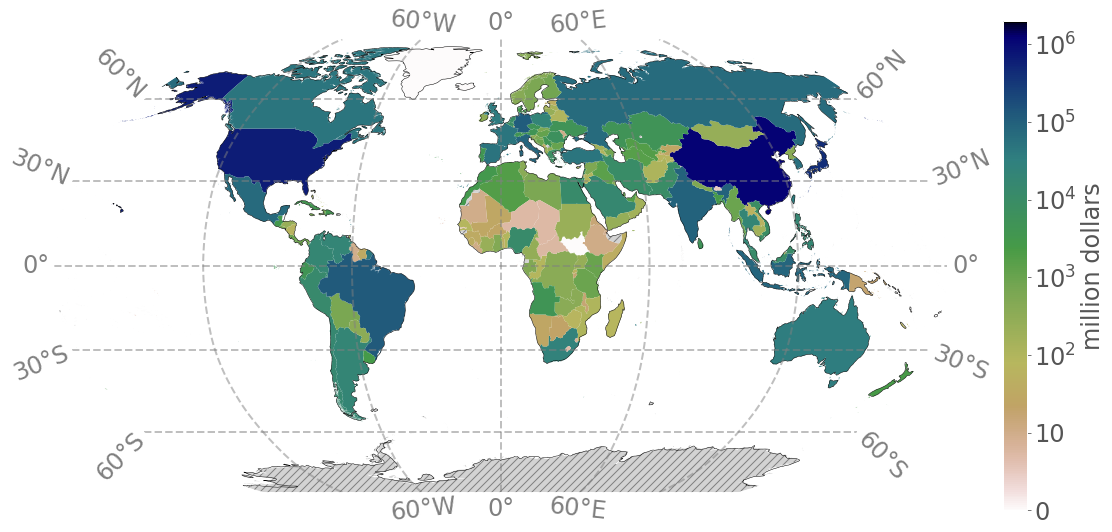

In [77]:
fig, ax = plt.subplots()
ax = plt.axes(projection=ccrs.Robinson())

robinson = ccrs.Robinson().proj4_init
df_shp.to_crs(robinson).plot(linewidths=0,column='S3_ext_total_log',ax=ax, vmin=0,vmax=6.3
            , legend=True, cmap = m.cm.gist_earth.reversed(), missing_kwds={
        "color": "lightgrey",
        "edgecolor": "grey",
        "hatch": "///",
        "label": "Missing values",},
        legend_kwds={'fmt': "{:.2f}"})

colourbar = ax.get_figure().get_axes()[1]
yticks = ['0','10','10$^{2}$','10$^{3}$','10$^{4}$','10$^{5}$','10$^{6}$']
colourbar.set_yticklabels(yticks,fontsize=24)
colourbar.set_ylabel('million dollars', fontsize=24)  
ax.coastlines()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabel_style = {'size': 24,'color':'gray'}
gl.ylabel_style = {'size': 24,'color':'gray'}
# plt.title('Externality——Scenario 3: Zero VSL for other countries',fontsize=24)
ax.axis('off');

In [66]:
print(dict(sorted(diff_12.items(), key=lambda item: item[1])))

{'CHN': -136977.86679366673, 'IND': -71914.02570134842, 'MEX': -26706.26747632955, 'PAK': -18590.055166478087, 'IDN': -15729.524154862258, 'VNM': -11723.420930921511, 'MMR': -11459.332587660967, 'PRK': -10600.227698268709, 'PHL': -10106.135930643668, 'UKR': -9681.394225571414, 'DZA': -8669.541867390824, 'BGD': -8049.289680903571, 'MAR': -7042.506923390223, 'EGY': -7004.995059743636, 'SRB': -6276.648222640848, 'THA': -6195.200553029143, 'BIH': -5796.298923493609, 'UZB': -5786.786049804387, 'CUB': -4851.072109539944, 'NPL': -3940.2023360683797, 'NGA': -3636.4452564749263, 'SYR': -3187.150984635151, 'AFG': -2983.1227743960126, 'COL': -2761.7897453149053, 'TUN': -2570.9145723601273, 'SUD': -2203.080593506712, 'BRA': -2030.130438395281, 'IRQ': -1984.9576012244488, 'YEM': -1970.0322652220912, 'ETH': -1940.2141950676041, 'MNG': -1741.26775548982, 'PER': -1676.9483693429393, 'AGO': -1638.1987969732063, 'GHA': -1632.5291037392685, 'HTI': -1517.105052000775, 'MOZ': -1498.5511832271134, 'COD': -1

In [67]:
# cmap = ListedColormap(['#238b45','#66c2a4','#b2e2e2','#edf8fb','#fef0d9','#fdd49e','#fdbb84','#fc8d59','#e34a33','#b30000'])
# bounds = [-152128,-10000,-1000,-100,0,100,1000,10000,100000,1000000,6124284]
# norm = BoundaryNorm(bounds, cmap.N)

In [68]:
# Shift cmap
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid

def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):
    '''
    Function to offset the "center" of a colormap. Useful for
    data with a negative min and positive max and you want the
    middle of the colormap's dynamic range to be at zero.

    Input
    -----
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower offset). Should be between
          0.0 and `midpoint`.
      midpoint : The new center of the colormap. Defaults to 
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax / (vmax + abs(vmin))
          For example if your data range from -15.0 to +5.0 and
          you want the center of the colormap at 0.0, `midpoint`
          should be set to  1 - 5/(5 + 15)) or 0.75
      stop : Offset from highest point in the colormap's range.
          Defaults to 1.0 (no upper offset). Should be between
          `midpoint` and 1.0.
    '''
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }

    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)

    # shifted index to match the data
    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False), 
        np.linspace(midpoint, 1.0, 129, endpoint=True)
    ])

    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))

    newcmap = matplotlib.colors.LinearSegmentedColormap(name, cdict)
    plt.register_cmap(cmap=newcmap)

    return newcmap

In [69]:
min(df_shp['diff_12_log']),max(df_shp['diff_12_log'])

(-5.136650398500006, 6.1103844472709605)

In [70]:
diff_list = list(df_shp[df_shp['diff_12_log']> -10]['diff_12_log'])
diff_list.sort()

In [71]:
diff_list.index(np.median(diff_list))/187

0.49732620320855614

In [72]:
df_shp[df_shp['diff_12_log']> -10]

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_ZH,geometry,S1_ext_total,S2_ext_total,S3_ext_total,diff_12,S1_ext_total_log,S2_ext_total_log,S3_ext_total_log,diff_12_log
0,Admin-0 country,5,2,Indonesia,IDN,0,2,Sovereign country,Indonesia,IDN,...,印度尼西亚,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...",109210.060030,93480.535875,85284.731429,-15729.524155,5.038263,4.970721,4.930871,-4.196716
1,Admin-0 country,5,3,Malaysia,MYS,0,2,Sovereign country,Malaysia,MYS,...,马来西亚,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...",28185.111200,28034.280164,11225.193536,-150.831036,4.450020,4.447689,4.050194,-2.178491
2,Admin-0 country,6,2,Chile,CHL,0,2,Sovereign country,Chile,CHL,...,智利,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...",22154.672191,24608.087371,15448.286823,2453.415179,4.345465,4.391078,4.188880,3.389771
3,Admin-0 country,0,3,Bolivia,BOL,0,2,Sovereign country,Bolivia,BOL,...,玻利維亞,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5...",2143.311736,1109.308022,674.450212,-1034.003714,3.331085,3.045052,2.828950,-3.014522
4,Admin-0 country,0,2,Peru,PER,0,2,Sovereign country,Peru,PER,...,秘鲁,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...",17994.137529,16317.189160,13223.021073,-1676.948369,4.255131,4.212645,4.121331,-3.224520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,Admin-0 country,3,4,Samoa,WSM,0,2,Sovereign country,Samoa,WSM,...,萨摩亚,"MULTIPOLYGON (((-172.20104 -13.59254, -172.197...",43.412202,22.532132,0.000000,-20.880069,1.637612,1.352802,-inf,-1.319732
235,Admin-0 country,6,5,Maldives,MDV,0,2,Sovereign country,Maldives,MDV,...,马尔代夫,"MULTIPOLYGON (((73.16310 -0.68182, 73.17254 -0...",259.621939,338.193957,14.507227,78.572018,2.414341,2.529166,1.161584,1.895268
240,Admin-0 country,5,4,Vanuatu,VUT,0,2,Sovereign country,Vanuatu,VUT,...,萬那杜,"MULTIPOLYGON (((169.84034 -20.14080, 169.86052...",40.293665,17.759501,0.000000,-22.534163,1.605237,1.249431,-inf,-1.352841
246,Admin-0 country,5,4,Bahrain,BHR,0,2,Sovereign country,Bahrain,BHR,...,巴林,"POLYGON ((50.55161 26.19424, 50.59474 26.16031...",1539.836859,4127.859689,20.329887,2588.022830,3.187475,3.615725,1.308135,3.412968


In [73]:
shifted_cmap = shiftedColorMap(matplotlib.cm.PiYG, midpoint=5.2/(5.2+6.2),name='shifted')

/home/shiyuan/anaconda3/envs/py36/lib/python3.6/site-packages/geopandas/plotting.py:376: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/home/shiyuan/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  app.launch_new_instance()


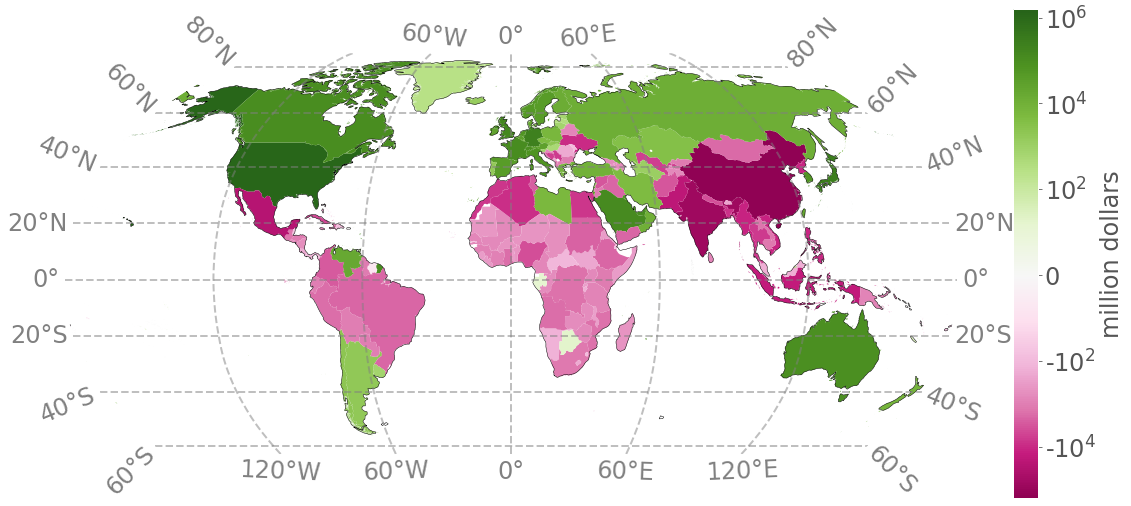

In [78]:
fig, ax = plt.subplots()
ax = plt.axes(projection=ccrs.Robinson())

robinson = ccrs.Robinson().proj4_init
df_shp[df_shp['diff_12_log']> -10].to_crs(robinson).plot(linewidths=0,column='diff_12_log',ax=ax, vmin=-5.2,vmax=6.2, legend=True, cmap = shifted_cmap, missing_kwds={
        "color": "lightgrey",
        "edgecolor": "grey",
        "hatch": "///",
        "label": "Missing values",},
        legend_kwds={'fmt': "{:.2f}"})

colourbar = ax.get_figure().get_axes()[1]

yticks = ['-10$^{4}$','-10$^{2}$','0','10$^{2}$','10$^{4}$','10$^{6}$']

colourbar.set_yticklabels(yticks,fontsize=24)

colourbar.set_ylabel('million dollars', fontsize=24) 
    
ax.coastlines()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabel_style = {'size': 24,'color':'gray'}
gl.ylabel_style = {'size': 24,'color':'gray'}
# plt.title('NEED A NAME',fontsize=24)
ax.axis('off');

# State the debate on choosing VSLs

## Accounting choice/decision

how much money are we saving if we buy things from 

What would be the difference in economic damages if 